In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./Naive_Bayes_Dataset_COVID.csv")
df.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [5]:
from sklearn import preprocessing

# encoding the categorical variables in the data as integer values as Naive Bayes only works with numerical data
le = preprocessing.LabelEncoder()

pc_encoded = le.fit_transform(df['pc'].values)
wbc_encoded = le.fit_transform(df['wbc'].values)
mc_encoded = le.fit_transform(df['mc'].values)
ast_encoded = le.fit_transform(df['ast'].values)
bc_encoded = le.fit_transform(df['bc'].values)
ldh_encoded = le.fit_transform(df['ldh'].values)
diagnosis_encoded = le.fit_transform(df['diagnosis'].values)

In [7]:
# labels
Y = le.fit_transform(df['diagnosis'].values)

# creating an array of input features (X) by combining the encoded variables into a single array using the zip function. 
X = np.array(list(zip(pc_encoded,wbc_encoded,mc_encoded,ast_encoded,bc_encoded,ldh_encoded)))

print(X)
print(Y)

[[1 1 1 0 1 1]
 [1 1 2 0 1 0]
 [1 0 2 0 1 1]
 [1 0 2 0 0 1]
 [1 2 0 0 1 1]
 [1 2 2 0 1 0]
 [2 1 1 0 1 1]
 [2 0 2 0 1 1]
 [2 0 2 0 0 0]
 [2 2 0 0 1 1]
 [2 2 0 0 1 0]
 [0 1 1 1 1 1]
 [0 2 0 1 1 1]
 [0 2 0 1 0 0]
 [0 0 2 1 1 0]
 [1 2 0 0 0 1]
 [2 2 0 0 0 1]
 [0 1 1 1 1 0]
 [2 2 2 0 1 1]
 [2 0 2 0 1 0]
 [2 1 2 0 1 0]
 [1 0 2 0 0 0]
 [1 1 1 0 0 0]
 [0 0 2 1 1 1]
 [0 2 2 1 1 1]]
[1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0]


In [8]:
# creating training and testing data sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

The Naive Bayes classifier is a simple probabilistic model based on the idea that the features in a dataset are independent of one another. Given a set of input features and a target variable, the classifier estimates the probability of each possible target value based on the frequency of the input features in the training data. The classifier then predicts the target value with the highest probability as the output.

In [9]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

# training and testing the model
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

y_pred

array([1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [12]:
# finding the accuracy score

from sklearn.metrics import accuracy_score, classification_report, roc_curve

print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.5714285714285714
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.60      0.75      0.67         4

    accuracy                           0.57         7
   macro avg       0.55      0.54      0.53         7
weighted avg       0.56      0.57      0.55         7



In [13]:
# For ploting the ROC curve

# storing the probabilitie of each data belonging to a class
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# caluclating the false posetive rate and true positive rate using roc_curve function
lr_fpr, lr_tpr, _= roc_curve(Y_test, lr_probs)


Text(0, 0.5, 'True Positive Rate')

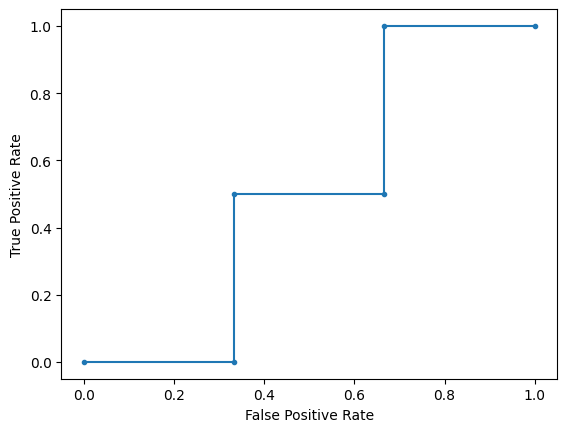

In [16]:
# Plotting the graph for the ROC

from matplotlib import pyplot
pyplot.plot(lr_fpr, lr_tpr, marker = ".")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')